![](https://ceebios.com/wp-content/uploads/2017/06/ceebios-logo-06-167x92.png)

# Ceebios Pokedex Python library

Several wrappers have been defined to easily access in Python to the following APIs (GBIF, Google Scholar, CoreAC, Wikipedia). Many functionalities have been wrapped to connect these sources altogether. 

The result is the library ``pokedex`` (preliminary name) that could be published afterwards in open source to ease bio-mimicry research for Data Scientists and engineers. 

This notebook will serve as the base for the documentation (we will create a proper documentation further on)

In [35]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

pd.options.display.max_columns = 500

# Add the following autoreload magics to automatically reload library in the development
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Import custom library

In [37]:
# Add local path to search for the development library locally
import sys
sys.path.append("../")

# Import custom modules
from pokedex.data import GBIFExtractor
from pokedex.data import GoogleScholarExtractor
from pokedex.data import CoreACExtractor
from pokedex.data import WikipediaExtractor

# Quickstart in 5 minutes

The goal of the library is typical in bio-mimicry research: **starts from a species and get scientific publications about this species** 

## Use case 1 : you know the latin name of the species

Let's say you are an expert and you already know a species is particularly interesting. <br>
You want to know everything and in particular get scientific publications. One common entry point is to **use the GBIF API** to get the minimum information needed to categorize a species

In [38]:
gbif = GBIFExtractor()

We will focus on the **vespa ducalis**, an interesting hornet. As we know the latin name (taxon) we will match directly with the GBIF database. 

In [39]:
vespa = gbif.match("vespa ducalis")
vespa

Species(name=Vespa ducalis)

The resulting object in Python is a custom object that will help us connect the different data sources and wrap many core functionalities of the library. 

In [40]:
vespa.info

{'kingdom': 'Animalia',
 'phylum': 'Arthropoda',
 'order': 'Hymenoptera',
 'genus': 'Vespa',
 'species': 'Vespa ducalis'}

### Searching on wikipedia

You can search wikipedia easily to learn more about this species

In [46]:
print(vespa.get_wikipedia_description()[:500] + " ...")

Vespa ducalis est un frelon.


== Description ==
La tête est jaune et porte des ocelles brunes. Le thorax est principalement noir. L'abdomen est plus coloré : les deux premiers segments sont bruns et jaunes avec de fines bandes noires. Les autres segments sont noirs. Il peut y avoir quelques fines bandes jaunes entre le troisième et le quatrième segment. Une ouvrière mesure entre 23 et 32 mm tandis qu'une reine 37 mm.  


== Répartition ==
Ce frelon est présent en Asie, de l'Inde au Japon et jus ...


You can also get other data like the image thumbnail

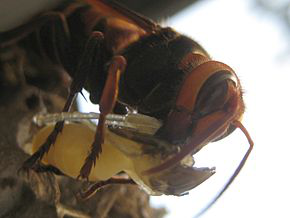

In [44]:
vespa.get_wikipedia_image(as_img = True)

Or directly open the wikipedia page from python

In [192]:
vespa.open_wikipedia()

##### Other features available
> Changing search language, get other images, get hyperlinks

### Searching for scientific publications

You can directly search for publications from Google Scholar or CoreAC APIs. 

In [48]:
publications = vespa.search_publications(n = 10,as_df = True,source = "google")
publications

title  \
0  Queen mating frequencies and genetic relatedne...   
1  Complete mitochondrial genome of the black‐tai...   
2  A novel peptide from vespa ducalis induces apo...   
3  Occurrence of Vespa velutina Lepeletier from K...   
4  Microsatellite loci for genetic research in th...   
5  A PRELIMINARY STUDY ON THE BIOLOGY OF WASPS VE...   
6  Hornet silk proteins in the cocoons produced b...   
7  Systematics of vespine wasps from Korea-(1)-Ge...   
8  Taxonomy and bionomics of the Vespa tropica gr...   
9  The common Oriental hornets, Vespa tropica and...   

                                            abstract  \
0  Vespa ducalis is a monogynous hornet with an a...   
1  We sequenced the complete mitochondrial genome...   
2  Osteosarcoma (OS) is a typical bone cancer, an...   
3  6. 4 Apical teeth of clypeus triangular in sha...   
4  Number of alleles (N A ), expected heterozygos...   
5  The present paper deals with the biology of wa...   
6  Vespa simillima, Vespa dybowskii, Vespa crabro...   
7  carima present; Vertex emarginated moderately ...   
8  Thus V. ducali^t would seem to consist of two ...   
9  There are also accounts of aerial nests referr...   

                                     author  \
0      [J Takahashi, S Akimoto, E Hasegawa]   
1      [JS Kim, JS Jeong, SY Jeong, MJ Kim]   
2       [R Wu, D Li, Q Tang, W Wang, G Xie]   
3                [JK KIM, MB Choi, TY MOON]   
4                 [E Hasegawa, J Takahashi]   
5                             [DDW Yunzhcn]   
6  [T Kameda, K Kojima, Q Zhang, H Sezutsu]   
7                [JK Kim, IB Yoon, TY Moon]   
8                               [ME Archer]   
9                              [J Bequaert]   

                                                 url   doi journal cites  year  
0  https://www.jstage.jst.go.jp/article/aez/37/3/...  None    None    17  2002  
1  https://onlinelibrary.wiley.com/doi/abs/10.111...  None    None     7  2017  
2  https://www.jstage.jst.go.jp/article/bpb/41/4/...  None    None     6  2018  
3  https://onlinelibrary.wiley.com/doi/abs/10.111...  None    None    59  2006  
4  https://onlinelibrary.wiley.com/doi/abs/10.104...  None    None    33  2002  
5  http://en.cnki.com.cn/Article_en/CJFDTotal-DWX...  None    None     3  1989  
6  https://www.sciencedirect.com/science/article/...  None    None    16  2008  
7  http://www.academia.edu/download/31978647/kim_...  None    None    15  1994  
8  https://www.academia.edu/download/31784676/arc...  None    None    16  1991  
9  http://www.academia.edu/download/48262467/Bequ...  None    None    28  1936

In [49]:
publications = vespa.search_publications(n = 10,as_df = True,source = "coreac")
publications

title  \
0  Cella di prova automatizzata per verifiche a f...   
1  Conflitti riproduttivi intracoloniali in Polis...   
2           Ice e sviluppo del commercio con la Cina   
3  L' EFFETTO DOPPELGANGER NELLA PERCEZIONE DELLA...   
4  Valutazioni e soluzioni riguardo alla tracciab...   
5  Analisi del mercato internazionale trasporti –...   
6  Population Genetic Structure of the Introduced...   
7  Caratterizzazione delle emissioni di motori al...   
8  IgE e IgG4 nell'immunoterapia specifica con ve...   
9  Population Genetic Structure of the Introduced...   

                                            abstract                   author  \
0  Questo studio, svolto in collaborazione con la...     [Palladino, Antonio]   
1  Le operaie di molti insetti sociali non si rip...       [Cini, Alessandro]   
2  La storia delle relazioni tra Cina e Italia ha...            [BANI, ANITA]   
3  L' EFFETTO DOPPELGANGER NELLA PERCEZIONE DELLA...         [FRANCO, ENRICO]   
4  La situazione del Mercato del settore 2R degli...         [ZECCHIN, LUANA]   
5  La tesi ha affrontato lo studio e analisi del ...        [Abate, Giovanni]   
6  168 p.Thesis (Ph.D.)--University of Illinois a...  [Collins, Sean Anthony]   
7  Il presente lavoro di tesi si inserisce nell’a...          [GHETTI, LAURA]   
8  Quello degli imenotteri è un gruppo di insetti...       [D'AMATO, CLAUDIA]   
9  168 p.Thesis (Ph.D.)--University of Illinois a...  [Collins, Sean Anthony]   

                                            url   doi          journal cites  \
0  https://core.ac.uk/download/pdf/14691365.pdf  None  Pisa University    []   
1                                                None  Pisa University    []   
2                                                None  Pisa University    []   
3  https://core.ac.uk/download/pdf/14696445.pdf  None  Pisa University    []   
4                                                None  Pisa University    []   
5  https://core.ac.uk/download/pdf/14693649.pdf  None  Pisa University    []   
6                                                None             None    []   
7                                                None  Pisa University    []   
8                                                None  Pisa University    []   
9                                                None             None    []   

    year  
0   2045  
1   2047  
2   2052  
3   2048  
4   2088  
5   2047  
6  10000  
7   2049  
8   2087  
9  10000

##### Features to develop
- Filtering by language
- Filtering by journal
- Scoring relevance
- Extracting functions from the articles

## Use case 2 : you don't know the latin name, just the regular name (vernacular name)

Let's say you are less of an expert, you just know the english or french name of a species, also called vernacular name. <br>
You can use the GBIF Search API wrapper as followed

In [51]:
whales = gbif.search("blue whale")
whales

[Species(name=Balaena musculus),
 Species(name=Balaenoptera musculus),
 Species(name=Balaenoptera physalus),
 Species(name=Zeusia herculea),
 Species(name=Ziminella vrijenhoeki),
 Species(name=Pleuroncodes planipes),
 Species(name=Remora australis),
 Species(name=Coronula diadema),
 Species(name=Praya dubia),
 Species(name=Bruhathkayosaurus matleyi),
 Species(name=Goezeella siluri),
 Species(name=Lobodon carcinophaga),
 Species(name=Balaenoptera borealis),
 Species(name=Dosidicus gigas),
 Species(name=Balaenoptera omurai),
 Species(name=Armillaria ostoyae),
 Species(name=Orcinus orca),
 Species(name=Cyanea spec.),
 Species(name=Balaenoptera bonaerensis),
 Species(name=Armillaria gallica),
 Species(name=Eubalaena japonica),
 Species(name=Physeter macrocephalus),
 Species(name=Megaptera novaeangliae),
 Species(name=Eschrichtius robustus),
 Species(name=Balaenoptera acutorostrata)]

You actually get many species in a list, each element functions the same way as shown in use case 1. For example if we take the best match (first element in the list). 

In [59]:
blue_whale = whales[1]
blue_whale

Species(name=Balaenoptera musculus)

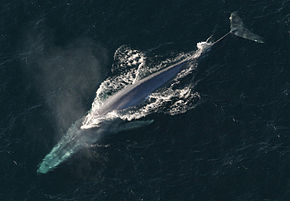

In [60]:
blue_whale.get_wikipedia_image(as_img = True)

In [61]:
print(blue_whale.get_wikipedia_description()[:500] + " ...")

La baleine bleue (Balaenoptera musculus), appelée aussi rorqual bleu, est une espèce de cétacés de la famille des Balaenopteridae. Pouvant dépasser 30 mètres de longueur et 170 tonnes, c'est le plus gros animal vivant à notre époque et dans l'état actuel des connaissances, le plus gros (avant deux grands sauropodes dont le séismosaure) ayant vécu sur Terre.
Long et mince, le corps de la baleine bleue peut prendre diverses teintes de gris-bleuté sur le dos et un peu plus clair en dessous. On déno ...


In [62]:
blue_whale.search_publications(n = 10,source = "coreac")

title  \
0  Biodiversity of macrofaunal assemblages from t...   
1  High prokaryotic biodiversity associated with ...   
2  Identifying Functional Orthologs between Homo ...   
3  Toxicology of Three Plant Neurotoxins in Droso...   
4  Pathological Changes and Immunity Associated W...   
5  Deep-sea bacterial communities in sediments an...   
6  Pathological Changes and Immunity Associated W...   
7  Biochemical Changes in the Musculus Complexus ...   
8  Genetic Changes in Pseudorabies Virus After Pa...   
9  Genetic Changes in Pseudorabies Virus After Pa...   

                                            abstract  \
0  The macrofaunal assemblages from three Portugu...   
1  Sediments in the Nazare Canyon (NE Atlantic) a...   
2  Over billions of years, organizms have gone th...   
3  65 p.Thesis (Ph.D.)--University of Illinois at...   
4  171 p.Thesis (Ph.D.)--University of Illinois a...   
5  Deposit-feeding holothurians often dominate th...   
6  171 p.Thesis (Ph.D.)--University of Illinois a...   
7  100 p.Thesis (Ph.D.)--University of Illinois a...   
8  161 p.Thesis (Ph.D.)--University of Illinois a...   
9  161 p.Thesis (Ph.D.)--University of Illinois a...   

                                              author  \
0  [Cunha, Marina R., Paterson, Gordon L. J., Ama...   
1  [Amaro, Teresa, Luna, Gian Marco, Danovaro, Ro...   
2                                 [Heimberg, Graham]   
3                                [Lustofin, Katrina]   
4                             [Blagburn, Byron Lynn]   
5  [Amaro, T, Witte, H, Herndl, GJ, Cunha, MR, Bi...   
6                             [Blagburn, Byron Lynn]   
7                             [Smail, James Richard]   
8                              [Hsu, Christopher H.]   
9                              [Hsu, Christopher H.]   

                                            url                         doi  \
0  https://core.ac.uk/download/pdf/15564608.pdf  10.1016/j.dsr2.2011.04.007   
1                                                 10.1016/j.dsr.2012.01.007   
2                                                                      None   
3                                                                      None   
4                                                                      None   
5                                                 10.1016/j.dsr.2009.05.014   
6                                                                      None   
7                                                                      None   
8                                                                      None   
9                                                                      None   

    journal cites   year  
0  Elsevier    []  10000  
1  Elsevier    []  10000  
2      None    []  10000  
3      None    []  10000  
4      None    []  10000  
5  Elsevier    []  10000  
6      None    []  10000  
7      None    []  10000  
8      None    []  10000  
9      None    []  10000